Plot results of ccf sampling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import zarr
import shutil

In [3]:
path = '/scratch/b/b380459/icon_4_hackathon/ccf'

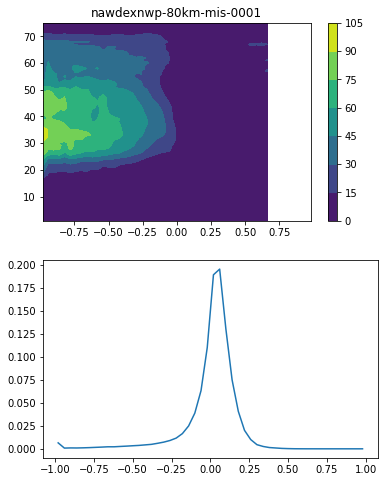

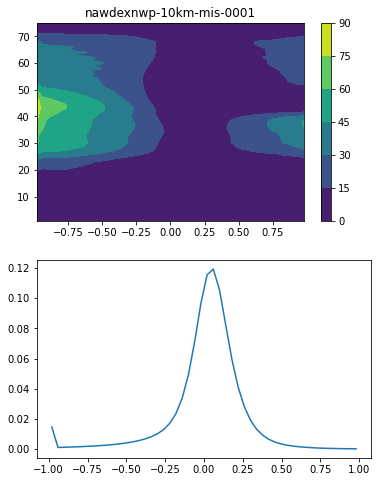

In [41]:
ccf = 'omega'
var = 'clc'

for sim in ['nawdexnwp-80km-mis-0001', 'nawdexnwp-10km-mis-0001']:
    ds_ccf = xr.open_zarr(path+'/'+sim+'_ccf_indexing_'+ccf+'.zarr')
    ds_var = xr.open_dataset(path+'/'+sim+'_clc_sampled_on_omega.nc')
    
    ccf_pdf = np.zeros(ds_ccf.bins.size)
    for i in range(ds_ccf.bins.size):
        ccf_pdf[i]= ds_ccf.where(ds_ccf['ccf_indices']==i)['weights'].sum()/ds_ccf['weights'].sum()
    
    plt.figure(figsize=(6,8))
    plt.subplot(2,1,1)
    plt.title(sim)
    plt.contourf(ds_var.bins, ds_var.height, ds_var[var+'_ccfsampled'].values.transpose()); plt.colorbar()
    plt.subplot(2,1,2)
    plt.plot(ds_var.bins, ccf_pdf)

In [28]:
ds_var['clc_ccfsampled'].shape

(50, 75)